In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
from matplotlib.figure import Figure

In [17]:
CIFAR_FILENAME = "Results/CIFAR-10_500CNN_500FCN.csv"
irrelevant_columns = [
    'aug_type',
    'aug',
    'vcp',
    'translation',
    'noise',
    'edge_noise',
    'rotation',
    'swap',
]
distance_columns = [
    'dist_1',
    'dist_4',
    'cos_1',
    'cos_4'
]

In [18]:
cifar_results: pd.DataFrame = pd.read_csv(CIFAR_FILENAME)
cifar_results.drop(columns=irrelevant_columns, inplace=True)
cifar_results.head()

,epoch,model,loss,val_loss,accuracy,val_accuracy,dist_1,dist_4,cos_1,cos_4
0,1,cnn,1.783103,1.572621,0.348771,0.427083,NaN,NaN,NaN,NaN
1,2,cnn,1.482024,1.423655,0.463000,0.490750,NaN,NaN,NaN,NaN
2,3,cnn,1.360812,1.321776,0.510562,0.531083,NaN,NaN,NaN,NaN
3,4,cnn,1.264729,1.240387,0.551771,0.562333,NaN,NaN,NaN,NaN
4,5,cnn,1.185412,1.149506,0.581417,0.597417,NaN,NaN,NaN,NaN


In [25]:
cnn_results: pd.DataFrame = cifar_results.loc[cifar_results['model'] == 'cnn']\
                                         .drop(columns=distance_columns)
cnn_results.head()

,epoch,model,loss,val_loss,accuracy,val_accuracy
0,1,cnn,1.783103,1.572621,0.348771,0.427083
1,2,cnn,1.482024,1.423655,0.463000,0.490750
2,3,cnn,1.360812,1.321776,0.510562,0.531083
3,4,cnn,1.264729,1.240387,0.551771,0.562333
4,5,cnn,1.185412,1.149506,0.581417,0.597417


In [24]:
fcn_results: pd.DataFrame = cifar_results.loc[cifar_results['model'] == 'fcn'].reset_index(drop=True)
fcn_results.head()

,epoch,model,loss,val_loss,accuracy,val_accuracy,dist_1,dist_4,cos_1,cos_4
0,1,fcn,1.204382,0.506559,0.825271,0.876583,0.000000,0.000000,0.000000,0.000000
1,2,fcn,0.385670,0.320877,0.899562,0.915833,0.002028,0.002116,0.000410,0.000444
2,3,fcn,0.205728,0.203105,0.943000,0.945833,0.002477,0.002566,0.000609,0.000651
3,4,fcn,0.113707,0.163716,0.969042,0.954750,0.002758,0.002848,0.000753,0.000800
4,5,fcn,0.071012,0.117775,0.981854,0.969833,0.002946,0.003022,0.000858,0.000900


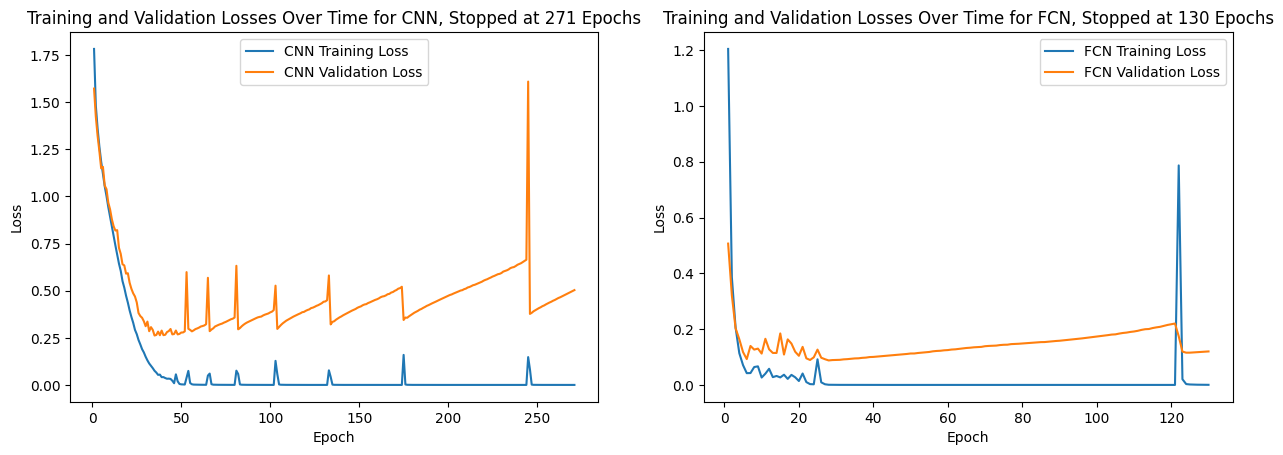

In [27]:
training_fig: Figure; cnn_ax: Axes; fcn_ax: Axes
training_fig, (cnn_ax, fcn_ax) = plt.subplots(1, 2)
training_fig.set_figwidth(15)
cnn_ax.plot(cnn_results['epoch'], cnn_results['loss'], label="CNN Training Loss")
cnn_ax.plot(cnn_results['epoch'], cnn_results['val_loss'], label="CNN Validation Loss")
fcn_ax.plot(fcn_results['epoch'], fcn_results['loss'], label="FCN Training Loss")
fcn_ax.plot(fcn_results['epoch'], fcn_results['val_loss'], label="FCN Validation Loss")
cnn_ax.set_xlabel("Epoch")
fcn_ax.set_xlabel("Epoch")
cnn_ax.set_ylabel("Loss")
fcn_ax.set_ylabel("Loss")
cnn_ax.set_title("Training and Validation Losses Over Time for CNN, Stopped at 271 Epochs")
fcn_ax.set_title("Training and Validation Losses Over Time for FCN, Stopped at 130 Epochs")
cnn_ax.legend()
fcn_ax.legend()
plt.show()

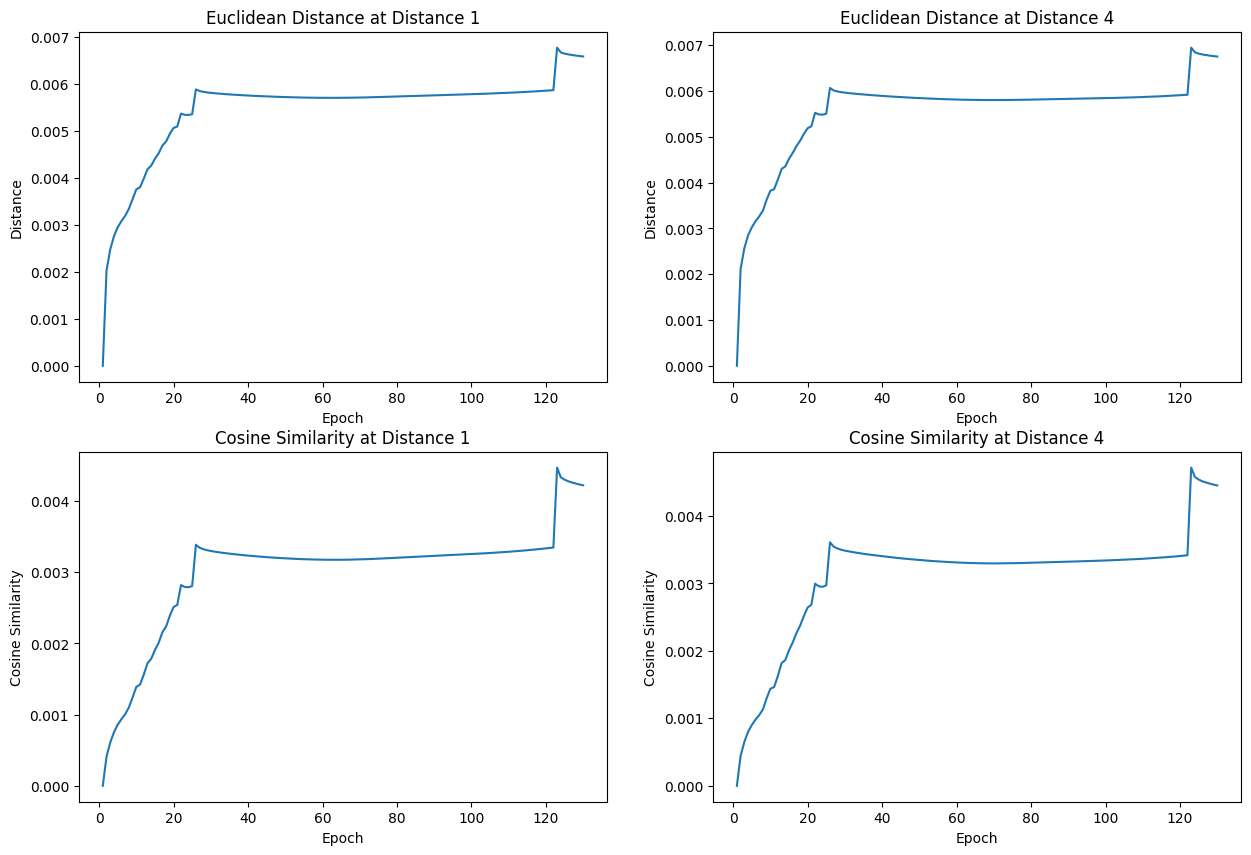

In [37]:
distance_fig: Figure; dist_1_ax: Axes; dist_4_ax: Axes; cos_1_ax: Axes; cos_4_ax: Axes
distance_fig, ((dist_1_ax, dist_4_ax), (cos_1_ax, cos_4_ax)) = plt.subplots(2, 2)
distance_fig.set_figwidth(15)
distance_fig.set_figheight(10)
dist_1_ax.plot(fcn_results['epoch'], fcn_results['dist_1'], label="Euclidean Distance at Distance 1")
dist_4_ax.plot(fcn_results['epoch'], fcn_results['dist_4'], label="Euclidean Distance at Distance 4")
cos_1_ax.plot(fcn_results['epoch'], fcn_results['cos_1'], label="Cosine Distance at Distance 1")
cos_4_ax.plot(fcn_results['epoch'], fcn_results['cos_4'], label="Cosine Distance at Distance 4")
dist_1_ax.set_xlabel("Epoch")
dist_1_ax.set_ylabel("Distance")
dist_4_ax.set_xlabel("Epoch")
dist_4_ax.set_ylabel("Distance")
cos_1_ax.set_xlabel("Epoch")
cos_1_ax.set_ylabel("Cosine Distance")
cos_4_ax.set_xlabel("Epoch")
cos_4_ax.set_ylabel("Cosine Distance")
dist_1_ax.set_title("Euclidean Distance at Distance 1")
dist_4_ax.set_title("Euclidean Distance at Distance 4")
cos_1_ax.set_title("Cosine Distance at Distance 1")
cos_4_ax.set_title("Cosine Distance at Distance 4")
plt.show()